# Diagram / Figures

This notebook contains diagrams and figures for the paper.

In [1]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy as sp
import pandas as pd
import matplotlib as mpl
#plt.style.use('ggplot')

In [2]:
from scipy.stats import multivariate_normal

In [3]:
fig_path = '/data/home/Github/scrna-parameter-estimation/figures/fig1/'

In [4]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)


### Simple demo - latent

In [177]:
num_cells = 1000

In [178]:
group_1 = stats.multivariate_normal.rvs(mean=[30, 20], cov=[[2**2, 1.5], [1.5, 1]], size=num_cells)

group_2 = stats.multivariate_normal.rvs(mean=[15, 20], cov=[[2**2, 0], [0, 36]], size=num_cells)

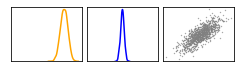

In [179]:
fig = plt.figure(figsize=(4,1))
plt.subplots_adjust(wspace=0.07)

plt.subplot(1, 3, 1)
sns.kdeplot(group_1[:, 0], color='orange')
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlim(0, 40)
plt.xlabel(None)

plt.subplot(1, 3, 2)
sns.kdeplot(group_1[:, 1], color='blue')
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlim(0, 40)
plt.xlabel(None)

plt.subplot(1, 3, 3)
plt.scatter(group_1[:, 0], group_1[:, 1], color='grey', s=0.1, alpha=1)
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlabel(None)
# plt.ylabel('Gene 2')

plt.savefig('latent_group_1.pdf', bbox_inches='tight')

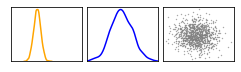

In [180]:
fig = plt.figure(figsize=(4,1))
plt.subplots_adjust(wspace=0.07)

plt.subplot(1, 3, 1)
sns.kdeplot(group_2[:, 0], color='orange')
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlim(0, 40)
# plt.xlabel('Gene 1')

plt.subplot(1, 3, 2)
sns.kdeplot(group_2[:, 1], color='blue')
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlim(0, 40)
# plt.xlabel('Gene 2')

plt.subplot(1, 3, 3)
plt.scatter(group_2[:, 0], group_2[:, 1], color='grey', s=0.1, alpha=1)
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
# plt.xlabel('Gene 1')
# plt.ylabel('Gene 2')

plt.savefig('latent_group_2.pdf', bbox_inches='tight')

### Simple demo - sampled

In [181]:
def generalized_binom_coef(x,y):

    return sp.special.gamma(x+1) / (sp.special.gamma(y+1) * sp.special.gamma(x-y+1))

class toy_rv(stats.rv_discrete):
    
    def _pmf(self, k, n, p):
        
        return generalized_binom_coef(n, k) * p ** (k) * (1-p)**(n-k)
        

In [182]:
group_1_sampled = toy_rv().rvs(n=group_1, p=0.05)

group_2[group_2 < 0] = 0.01
group_2_sampled = toy_rv().rvs(n=group_2, p=0.05)

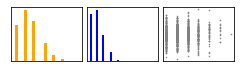

In [190]:
fig = plt.figure(figsize=(4,1))
plt.subplots_adjust(wspace=0.07)

plt.subplot(1, 3, 1)
plt.hist(group_1_sampled[:, 0], color='orange', bins=20)
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlim(-0.5, 7)
plt.xlabel(None)

plt.subplot(1, 3, 2)
plt.hist(group_1_sampled[:, 1], color='blue', bins=20)
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlim(-0.5, 10)
plt.xlabel(None)

plt.subplot(1, 3, 3)
plt.scatter(group_1_sampled[:, 0], group_1[:, 1], color='grey', s=0.3, alpha=1)
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlabel(None)
# plt.ylabel('Gene 2')

plt.savefig('sampled_group_1.pdf', bbox_inches='tight')

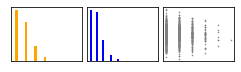

In [189]:
fig = plt.figure(figsize=(4,1))
plt.subplots_adjust(wspace=0.07)

plt.subplot(1, 3, 1)
plt.hist(group_2_sampled[:, 0], color='orange', bins=20)
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlim(-0.5, 7)
plt.xlabel(None)

plt.subplot(1, 3, 2)
plt.hist(group_2_sampled[:, 1], color='blue', bins=20)
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlim(-0.5, 10)
plt.xlabel(None)

plt.subplot(1, 3, 3)
plt.scatter(group_2_sampled[:, 0], group_1[:, 1], color='grey', s=0.3, alpha=1)
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlabel(None)
# plt.ylabel('Gene 2')

plt.savefig('sampled_group_2.pdf', bbox_inches='tight')

### Fast bootstrap demo

In [194]:
group_1_sampled[:, 1].max()

6

In [200]:
print(group_1_sampled[:25, 0])

[0 0 1 2 1 3 2 0 0 2 2 1 0 0 0 4 1 4 1 2 1 0 2 2 2]


In [ ]:
np.r

In [ ]:
np.bincount(

array([1, 1, 2, 1])

In [230]:
np.bincount(boot_iters[i, :])

array([17, 11, 13,  7,  2])

In [247]:
boot_iters_freq.shape

AttributeError: 'list' object has no attribute 'shape'

In [278]:
boot_iters = []
nc = 30
nb = 5
a = group_1_sampled[:nc, 0]
boot_iters.append(a)
for i in range(nb):
    boot_iters.append(np.random.choice(a, a.shape[0]))
boot_iters = np.vstack(boot_iters)
boot_iters = pd.DataFrame(
    data=boot_iters, 
    columns=['cell'+str(i) for i in range(1,nc+1)],
    index=['bs'+str(i) if i > 0 else 'obs' for i in range(nb+1)])

boot_iters_freq = []
for i in range(nb+1):
    boot_iters_freq.append(np.bincount(boot_iters.iloc[i, :].values))
boot_iters_freq = np.vstack(boot_iters_freq)
boot_iters_freq = pd.DataFrame(
    data=boot_iters_freq, 
    columns=['freq'+str(i) for i in range(boot_iters_freq.shape[1])],
    index=['bs'+str(i) if i > 0 else 'obs' for i in range(nb+1)])

In [284]:
boot_iters_freq.to_csv('fast_bs.csv')
boot_iters.to_csv('naive_bs.csv')

In [279]:
print(boot_iters_freq)

     freq0  freq1  freq2  freq3  freq4
obs      9      8      9      2      2
bs1     13      7      5      3      2
bs2      5      8     10      4      3
bs3      8      5      8      4      5
bs4      8      7     10      1      4
bs5     12      7      9      0      2
